# The source code is for data collection and analysis for the project

# Similarities between Popular US Cities for Tourists: an Exploratory Study Using Foursquare API

### Postal code - coordinates data is downloaded from https://public.opendatasoft.com/

In [1]:
import numpy as np
import pandas as pd
import re

### New Orleans, Portland, Nashville, Miami, Charleston

In [2]:
post2coor=pd.read_csv("us-zip-code-latitude-and-longitude.csv")
columns=['Postcode','Latitude','Longitude']
df_NewOrleans=pd.DataFrame(columns=columns)
df_Portland=pd.DataFrame(columns=columns)
df_Nashville=pd.DataFrame(columns=columns)
df_Miami=pd.DataFrame(columns=columns)
df_Charleston=pd.DataFrame(columns=columns)

for i in range(len(post2coor)):
    
    if post2coor.iloc[i]['City']=='New Orleans' and post2coor.iloc[i]['State']=='LA':
        zipcode=str(post2coor.iloc[i]['Zip'])
        lat=post2coor.iloc[i]['Latitude']
        long=post2coor.iloc[i]['Longitude']
        values=[zipcode,lat,long]
        df_NewOrleans=df_NewOrleans.append(pd.Series(values,index=columns),ignore_index=True)
        
    if post2coor.iloc[i]['City']=='Portland' and post2coor.iloc[i]['State']=='OR':
        zipcode=str(post2coor.iloc[i]['Zip'])
        lat=post2coor.iloc[i]['Latitude']
        long=post2coor.iloc[i]['Longitude']
        values=[zipcode,lat,long]
        df_Portland=df_Portland.append(pd.Series(values,index=columns),ignore_index=True)
        
    if post2coor.iloc[i]['City']=='Nashville' and post2coor.iloc[i]['State']=='TN':
        zipcode=str(post2coor.iloc[i]['Zip'])
        lat=post2coor.iloc[i]['Latitude']
        long=post2coor.iloc[i]['Longitude']
        values=[zipcode,lat,long]
        df_Nashville=df_Nashville.append(pd.Series(values,index=columns),ignore_index=True)
        
    if post2coor.iloc[i]['City']=='Miami' and post2coor.iloc[i]['State']=='FL':
        zipcode=str(post2coor.iloc[i]['Zip'])
        lat=post2coor.iloc[i]['Latitude']
        long=post2coor.iloc[i]['Longitude']
        values=[zipcode,lat,long]
        df_Miami=df_Miami.append(pd.Series(values,index=columns),ignore_index=True)
        
    if post2coor.iloc[i]['City']=='Charleston' and post2coor.iloc[i]['State']=='SC':
        zipcode=str(post2coor.iloc[i]['Zip'])
        lat=post2coor.iloc[i]['Latitude']
        long=post2coor.iloc[i]['Longitude']
        values=[zipcode,lat,long]
        df_Charleston=df_Charleston.append(pd.Series(values,index=columns),ignore_index=True)   
        
#print(df_NewOrleans)
#print(df_Portland)
#print(df_Nashville)
#print(df_Miami)
#print(df_Charleston)

In [3]:
print(np.shape(df_NewOrleans))
print(np.shape(df_Portland))
print(np.shape(df_Nashville))
print(np.shape(df_Miami))
print(np.shape(df_Charleston))

(66, 3)
(63, 3)
(45, 3)
(96, 3)
(19, 3)


#### Create maps

In [4]:
import folium

cityname=df_Charleston

latitude=cityname['Latitude'].mean()
longitude=cityname['Longitude'].mean()

map0 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(cityname['Latitude'], cityname['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map0)  


### Acquire data from Foursquare API

In [8]:
import requests

CLIENT_ID = 'FQSS1JCEKBE2MH50Q3ZUKMGUWL3CWHVCREBY3XTYZMFZE2IA' # your Foursquare ID
CLIENT_SECRET = '01WDQZYC4WKJMY1W1WM1Q21LPXL2MBSHJFDX5UVAYMDYG0V3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=200

def getNearbyVenues(postcodes, latitudes, longitudes, radius=1000):
    venues_list=[]
    for postcode, lat, lng in zip(postcodes, latitudes, longitudes):
        #print(postcode)    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            postcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood Zip', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)
    

#### To get primary category for each venue: data retrieved from Foursquare API

In [9]:
f = open('Foursquare_category', 'r')
lines = f.readlines()
f.close()
import pandas as pd
columns=['primary','sub']
FScategory=pd.DataFrame(columns=columns)
prime=lines[0]
for i in range(len(lines)):
    a=lines[i]
    a=a.replace('\n','')
    values=[]
    if a[:1]!=' ':
        prime=a
    if "Suggested Countries" in a:
        continue
    values.append(prime) 
    a=a.strip()
    values.append(a)
    FScategory=FScategory.append(pd.Series(values,index=columns),ignore_index=True)
print(FScategory['primary'].unique())   
#print(FScategory) 

['Arts & Entertainment' 'College & University' 'Event' 'Food'
 'Nightlife Spot' 'Outdoors & Recreation' 'Professional & Other Places'
 'Residence' 'Shop & Service' 'Travel & Transport']


#### Get nearby venues for New Orleans

In [10]:
NewOrleans_venues = getNearbyVenues(postcodes=df_NewOrleans['Postcode'],
                                   latitudes=df_NewOrleans['Latitude'],
                                   longitudes=df_NewOrleans['Longitude'])

Portland_venues = getNearbyVenues(postcodes=df_Portland['Postcode'],
                                   latitudes=df_Portland['Latitude'],
                                   longitudes=df_Portland['Longitude'])

Nashville_venues = getNearbyVenues(postcodes=df_Nashville['Postcode'],
                                   latitudes=df_Nashville['Latitude'],
                                   longitudes=df_Nashville['Longitude'])

Miami_venues = getNearbyVenues(postcodes=df_Miami['Postcode'],
                                   latitudes=df_Miami['Latitude'],
                                   longitudes=df_Miami['Longitude'])

Charleston_venues = getNearbyVenues(postcodes=df_Charleston['Postcode'],
                                   latitudes=df_Charleston['Latitude'],
                                   longitudes=df_Charleston['Longitude'])

In [11]:
def addprim(df,fs):
    primcate=[]
    k=0
    for i in range(len(df)):
        c=df.iloc[i]['Venue Category']  
        a=fs.loc[fs['sub']==c]
        if len(a)!=0:
            b=a.index[0]
            primcate.append(fs.iloc[b]['primary'])
        elif "Service" in c:        
            primcate.append('Shop & Service')
        elif "Pharmacy" in c:        
            primcate.append('Shop & Service')
        elif "Gas Station" in c:        
            primcate.append('Shop & Service') 
        elif "Restaurant" in c:        
            primcate.append('Food') 
        elif "Office" in c:        
            primcate.append('Shop & Service')   
        elif "Park" in c:
            primcate.append('Outdoors & Recreation')   
        else:
            primcate.append(c)
            #print(c)
            k+=1       
    df['Primary']=primcate 
    return(df)

In [12]:
NewOrleans_venues=addprim(NewOrleans_venues,FScategory)

Portland_venues=addprim(Portland_venues,FScategory)

Nashville_venues=addprim(Nashville_venues,FScategory)

Miami_venues=addprim(Miami_venues,FScategory)

Charleston_venues=addprim(Charleston_venues,FScategory)

In [16]:
print(NewOrleans_venues['Neighborhood Zip'].unique())
print(df_NewOrleans['Postcode'].unique())

['70112' '70113' '70114' '70115' '70116' '70117' '70118' '70119' '70121'
 '70122' '70123' '70124' '70125' '70126' '70127' '70128' '70130' '70131'
 '70140' '70141' '70144' '70148' '70155' '70158' '70163' '70181' '70182'
 '70183' '70199']
['70112' '70113' '70114' '70115' '70116' '70117' '70118' '70119' '70121'
 '70122' '70123' '70124' '70125' '70126' '70127' '70128' '70129' '70130'
 '70131' '70139' '70140' '70141' '70142' '70143' '70144' '70145' '70146'
 '70148' '70149' '70150' '70151' '70152' '70153' '70154' '70155' '70156'
 '70157' '70158' '70159' '70160' '70161' '70162' '70163' '70164' '70165'
 '70166' '70167' '70170' '70172' '70174' '70175' '70176' '70177' '70178'
 '70179' '70181' '70182' '70183' '70184' '70185' '70186' '70187' '70189'
 '70190' '70195' '70199']


In [53]:
print(np.shape(NewOrleans_venues))
print(np.shape(Portland_venues))
print(np.shape(Nashville_venues))
print(np.shape(Miami_venues))
print(np.shape(Charleston_venues))
print(NewOrleans_venues['Neighborhood Zip'].unique())

(1270, 8)
(2102, 8)
(1575, 8)
(2462, 8)
(634, 8)
['70112' '70113' '70114' '70115' '70116' '70117' '70118' '70119' '70121'
 '70122' '70123' '70124' '70125' '70126' '70127' '70128' '70130' '70131'
 '70140' '70141' '70144' '70148' '70155' '70158' '70163' '70181' '70182'
 '70183' '70199']


In [58]:
from sklearn.cluster import KMeans

Category=['Arts & Entertainment','Event','Food','Nightlife Spot','Outdoors & Recreation',
'Shop & Service','Travel & Transport','Professional & Other Places','Residence','College & University']

def neivectors(df,tourist):
    df2=pd.DataFrame(columns=tourist)
    Tstat=df[['Neighborhood Zip','Neighborhood Latitude']].groupby('Neighborhood Zip').count()
    Tstat.reset_index(drop=False,inplace=True) 
    df2['Zip']=Tstat['Neighborhood Zip'].values  
    for i in range(len(tourist)):
        Tstat=df[df['Primary'] == tourist[i]]\
            [['Neighborhood Zip','Primary']].groupby('Neighborhood Zip').count()
        Tstat.reset_index(drop=False,inplace=True) 
        df2.at[:,tourist[i]]=0
        if len(Tstat)==0:
            continue
        for j in range(len(Tstat)):
            idx=df2.loc[df2['Zip'] == Tstat.iloc[j]['Neighborhood Zip']].index[0]
            df2.at[idx,tourist[i]]=Tstat.iloc[j]['Primary']
    return(df2)

def neicluster(df,tourist):
    neivec=[]
    for i in range(len(df)):
        values=[]
        for v in range(len(tourist)):
            values.append(float(df.iloc[i,v]))
        neivec.append(values)
    return(neivec)

In [253]:
city1=Portland_venues
city2=df_Portland

nclass=3
test=neivectors(city1,Category)
test2=neicluster(test,Category)
kmeans = KMeans(n_clusters=nclass, random_state=0).fit(test2)
city3=pd.DataFrame(columns=city2.columns)

for i in range(len(test)):
    idx=city2.loc[city2['Postcode'] == test.iloc[i]['Zip']].index[0]
    lat=city2.iloc[idx]['Latitude']
    lon=city2.iloc[idx]['Longitude']
    pos=city2.iloc[idx]['Postcode']
    values=[pos,lat,lon]
    city3=city3.append(pd.Series(values,index=city3.columns),ignore_index=True)
city3['class']=kmeans.labels_
#check:
print(kmeans.labels_)
for j in range(nclass):
    print('\n')
    print('class {}'.format(j))
    k=0
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i]==j:
            print(test2[i])
            k+=1
    print(k)

[0 2 2 1 1 2 0 2 1 1 1 2 2 1 2 2 1 0 2 0 0 2 0 2 0 1 2 0 0 0 1 0 0 2 0 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]


class 0
[0.0, 0.0, 6.0, 1.0, 8.0, 7.0, 3.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 6.0, 2.0, 3.0, 5.0, 2.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 7.0, 0.0, 3.0, 6.0, 3.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 6.0, 1.0, 7.0, 6.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 6.0, 1.0, 0.0, 7.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 6.0, 1.0, 1.0, 7.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 5.0, 0.0, 2.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 5.0, 3.0, 2.0, 7.0, 1.0, 0.0, 0.0, 0.0]
14


class 1
[5.0, 0.0, 60.0, 5.0, 3.0, 14.0, 12.0, 0.0, 0.0, 0.0]
[9.0, 0.0, 45.0, 10.0, 2.0, 23.0, 8.0, 0.0, 0.0, 0.0]
[2.0, 0.0, 44.0, 12.0, 4.0, 31.0, 4.

In [254]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

cityname=city3 #change city name to view different city

latitude=cityname['Latitude'].mean()
longitude=cityname['Longitude'].mean()

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(Touristlabel)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['gray','red','blue']

# add markers to the map

for lat, lon, cluster in \
zip(cityname['Latitude'], cityname['Longitude'],\
    cityname['class']):
    map_clusters.add_child(folium.Marker(location=[lat, lon], \
       icon=folium.Icon(color=rainbow[cluster], \
       prefix='fa', icon='circle'))) 

legend_html = '''
<div style="position: fixed; 
top: 10px; left: 50px; width: 200px; height: 100px; 
border:2px solid grey; z-index:9999; font-size:14px;
">Popular(general):<i class="fa fa-map-marker fa-2x" style="color:red"></i>
&nbsp;&nbsp Popular(food & shopping):<i class="fa fa-map-marker fa-2x" style="color:blue"></i>
&nbsp;&nbsp Less Venues:<i class="fa fa-map-marker fa-2x" style="color:gray"></i>
</div>
''' 
map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

### Evaulate multicultural diversity index of each city. Variety of resturant types is one of best representative quantities to measure the multicultural diversity.

#### Organize Foursquare Category Hierarchy

In [107]:
f = open('Foursquare_category', 'r')
lines = f.readlines()
f.close()
import pandas as pd
columns=['primary','sub1','sub2','sub3']
FScategory2=pd.DataFrame(columns=columns)
prime='None'
sb1='None'
sb2='None'
sb3='None'
for i in range(len(lines)):
    a=lines[i]
    a=a.replace('\n','')
    values=[]
    if "Suggested Countries" in a:
        continue
    if a[:1]!=' ':
        prime=a
        sb1='None'
        sb2='None'
        sb3='None'
    elif a[4:5]!=' ':
        sb1=a
        sb2='None'
        sb3='None'
    elif a[8:9]!=' ':
        sb2=a
        sb3='None'
    else:
        sb3=a
    prime=prime.strip()
    sb1=sb1.strip()
    sb2=sb2.strip()
    sb3=sb3.strip()
    values=[prime,sb1,sb2,sb3]
    FScategory2=FScategory2.append(pd.Series(values,index=columns),ignore_index=True)
print(FScategory2)   

                  primary                    sub1   sub2  sub3
0    Arts & Entertainment                    None   None  None
1    Arts & Entertainment                Aquarium   None  None
2    Arts & Entertainment                  Arcade   None  None
3    Arts & Entertainment             Art Gallery   None  None
4    Arts & Entertainment           Bowling Alley   None  None
..                    ...                     ...    ...   ...
758    Travel & Transport           Train Station  Train  None
759    Travel & Transport            Tram Station   None  None
760    Travel & Transport  Transportation Service   None  None
761    Travel & Transport           Travel Lounge   None  None
762    Travel & Transport                  Tunnel   None  None

[763 rows x 4 columns]


In [139]:
def getRes(df,fs):
    columns=['Restaurant','Number']
    Tres=pd.DataFrame(columns=columns)
    for i in range(len(df)):
        cname=df.iloc[i]['Venue Category']
        pname=df.iloc[i]['Primary']
        if 'Restaurant' in cname:
            a=fs.loc[fs['primary']==cname]
            if len(a)!=0:
                cname='General'
            a=fs.loc[fs['sub2']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']
            a=fs.loc[fs['sub3']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']  
            if 'Fast Food' in cname or 'Seafood' in cname \
            or 'Vegetarian' in cname or cname=='Restaurant' \
            or 'Comfort' in cname:
                cname='Z-General Restaurant' 
                continue
            cname=cname.replace(' Restaurant','')    
            values=[cname,'1']
            Tres=Tres.append(pd.Series(values,index=columns),ignore_index=True)
    Tstat=Tres[['Restaurant','Number']].groupby('Restaurant').count()
    Tstat.sort_values(by='Restaurant',ascending=False,inplace=True)
    Tstat.reset_index(drop=False,inplace=True)
    totalnum=Tstat.sum().iloc[1]
    Tstat = Tstat.astype({"Number": float})
    for i in range(len(Tstat)):
        t=Tstat.iloc[i]['Number']
        Tstat.at[i,'Number']=t/totalnum
    print('Finished')
    return(Tstat)

In [140]:
Tres_NewOrleans=getRes(NewOrleans_venues,FScategory2)
Tres_Portland=getRes(Portland_venues,FScategory2)
Tres_Nashville=getRes(Nashville_venues,FScategory2)
Tres_Miami=getRes(Miami_venues,FScategory2)
Tres_Charleston=getRes(Charleston_venues,FScategory2)

Finished
Finished
Finished
Finished
Finished


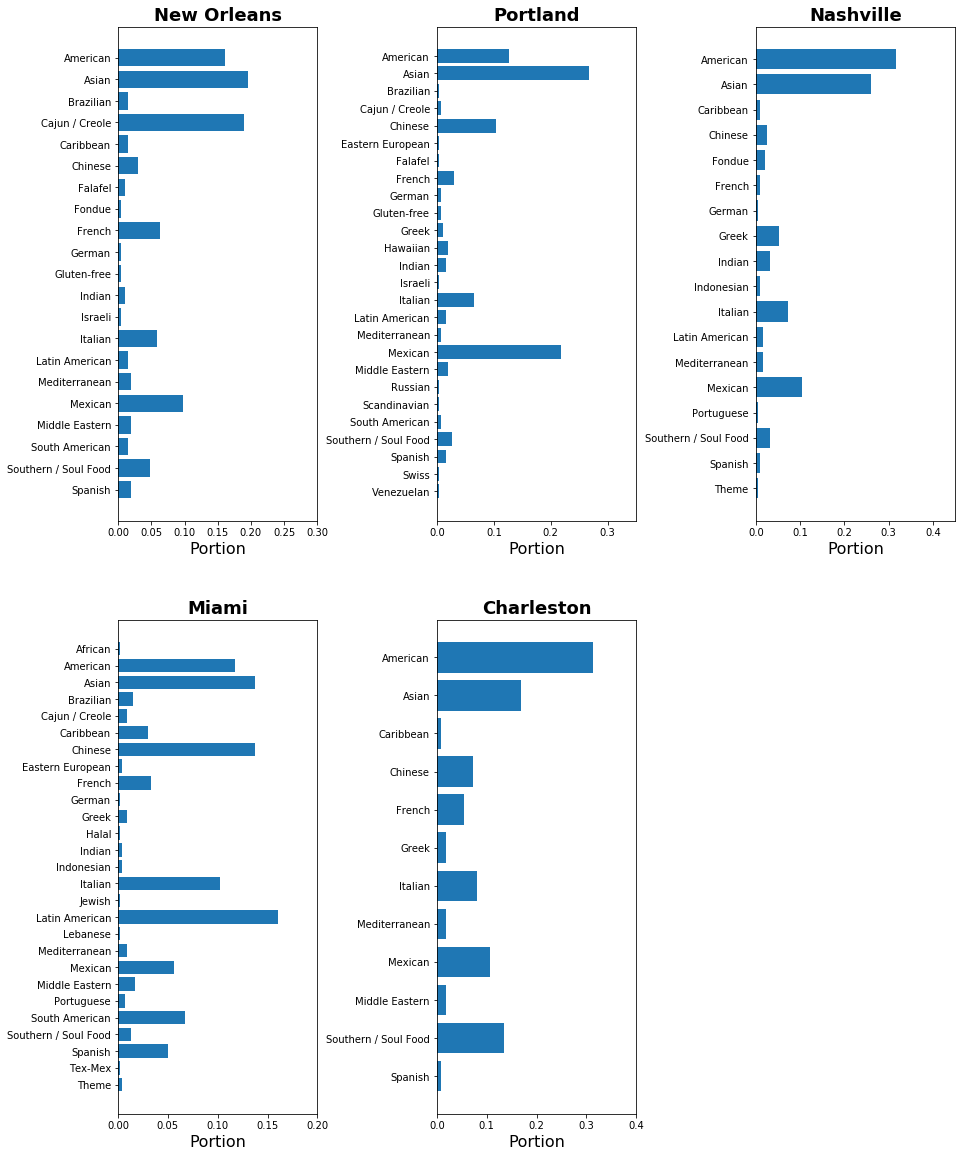

In [157]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15,20])

NO=plt.subplot(2, 3, 1)
plt.barh(Tres_NewOrleans.iloc[:]['Restaurant'], 
         Tres_NewOrleans.iloc[:]['Number'], align='center')
NO.set_xlim([0, 0.3])
NO.set_xlabel('Portion', fontsize=16)
NO.set_title('New Orleans', fontsize=18,weight='bold')

PO=plt.subplot(2, 3, 2)
plt.barh(Tres_Portland.iloc[:]['Restaurant'], 
         Tres_Portland.iloc[:]['Number'], align='center')
PO.set_xlim([0, 0.35])
PO.set_xlabel('Portion', fontsize=16)
PO.set_title('Portland', fontsize=18,weight='bold')

NA=plt.subplot(2, 3, 3)
plt.barh(Tres_Nashville.iloc[:]['Restaurant'], 
         Tres_Nashville.iloc[:]['Number'], align='center')
NA.set_xlim([0, 0.45])
NA.set_xlabel('Portion', fontsize=16)
NA.set_title('Nashville', fontsize=18,weight='bold')

MI=plt.subplot(2, 3, 4)
plt.barh(Tres_Miami.iloc[:]['Restaurant'], 
         Tres_Miami.iloc[:]['Number'], align='center')
MI.set_xlim([0, 0.2])
MI.set_xlabel('Portion', fontsize=16)
MI.set_title('Miami', fontsize=18,weight='bold')

CH=plt.subplot(2, 3, 5)
plt.barh(Tres_Charleston.iloc[:]['Restaurant'], 
         Tres_Charleston.iloc[:]['Number'], align='center')
CH.set_xlim([0, 0.4])
CH.set_xlabel('Portion', fontsize=16)
CH.set_title('Charleston', fontsize=18,weight='bold')

plt.subplots_adjust(wspace=0.6, hspace=0.2)
plt.show()
fig.savefig('Restaurant.png', dpi=300)

### Shannon-Wiener Index

In [158]:
import math
def swindex(df):
    sw=0.0
    for i in range(len(df)):
        t=df.iloc[i]['Number']
        sw-=t*math.log(t,2)
    print('Shannon-Wiener Index is {}'.format(sw))
    return(sw)
        
sw_NewOrleans=swindex(Tres_NewOrleans)  
sw_Portland=swindex(Tres_Portland)  
sw_Nashville=swindex(Tres_Nashville)  
sw_Miami=swindex(Tres_Miami)  
sw_Charleston=swindex(Tres_Charleston)  

Shannon-Wiener Index is 3.4902837557296373
Shannon-Wiener Index is 3.333102269867692
Shannon-Wiener Index is 3.0066147350768
Shannon-Wiener Index is 3.6887023582269642
Shannon-Wiener Index is 2.915412624659467


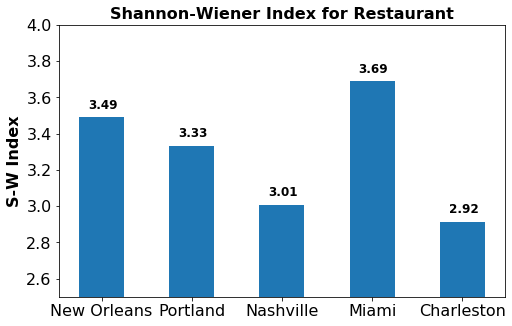

In [160]:
fig = plt.figure(figsize=[8,5])
NO=plt.subplot(1, 1, 1)
city=['New Orleans','Portland','Nashville','Miami','Charleston']
swcity=[sw_NewOrleans,sw_Portland,sw_Nashville,sw_Miami,sw_Charleston]
plt.bar(city, swcity,width=0.5)
r=[1,2,3,4,5]
label=swcity
for i in range(len(city)):
    plt.text(x = r[i]-1.15, y = swcity[i]+0.05, \
             s = round(label[i],2), size = 12, weight='bold')

NO.set_ylim([2.5, 4.0])
NO.set_ylabel('S-W Index',weight='bold',fontsize=16)
NO.tick_params(axis="y", labelsize=16)
NO.tick_params(axis="x", labelsize=16)
NO.set_title('Shannon-Wiener Index for Restaurant',weight='bold',fontsize=16)
fig.savefig('Restaurant-index.png', dpi=300)

### Consider Variety in Entertainment

In [120]:
print(FScategory2)

                  primary                    sub1   sub2  sub3
0    Arts & Entertainment                    None   None  None
1    Arts & Entertainment                Aquarium   None  None
2    Arts & Entertainment                  Arcade   None  None
3    Arts & Entertainment             Art Gallery   None  None
4    Arts & Entertainment           Bowling Alley   None  None
..                    ...                     ...    ...   ...
758    Travel & Transport           Train Station  Train  None
759    Travel & Transport            Tram Station   None  None
760    Travel & Transport  Transportation Service   None  None
761    Travel & Transport           Travel Lounge   None  None
762    Travel & Transport                  Tunnel   None  None

[763 rows x 4 columns]


In [161]:
def getFun(df,fs):
    columns=['Entertainment','Number']
    Tres=pd.DataFrame(columns=columns)
    for i in range(len(df)):
        cname=df.iloc[i]['Venue Category']
        pname=df.iloc[i]['Primary']
        if pname=='Arts & Entertainment' or pname=='Nightlife Spot' or pname=='Event':
            a=fs.loc[fs['primary']==cname]
            if len(a)!=0:
                cname='General'
            a=fs.loc[fs['sub2']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']
            a=fs.loc[fs['sub3']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']    
            values=[cname,'1']
            Tres=Tres.append(pd.Series(values,index=columns),ignore_index=True)
    Tstat=Tres[['Entertainment','Number']].groupby('Entertainment').count()
    Tstat.sort_values(by='Entertainment',ascending=False,inplace=True)
    Tstat.reset_index(drop=False,inplace=True)
    totalnum=Tstat.sum().iloc[1]
    Tstat = Tstat.astype({"Number": float})
    for i in range(len(Tstat)):
        t=Tstat.iloc[i]['Number']
        Tstat.at[i,'Number']=t/totalnum
    print('Finished')
    return(Tstat)

In [162]:
Fun_NewOrleans=getFun(NewOrleans_venues,FScategory2)
Fun_Portland=getFun(Portland_venues,FScategory2)
Fun_Nashville=getFun(Nashville_venues,FScategory2)
Fun_Miami=getFun(Miami_venues,FScategory2)
Fun_Charleston=getFun(Charleston_venues,FScategory2)

Finished
Finished
Finished
Finished
Finished


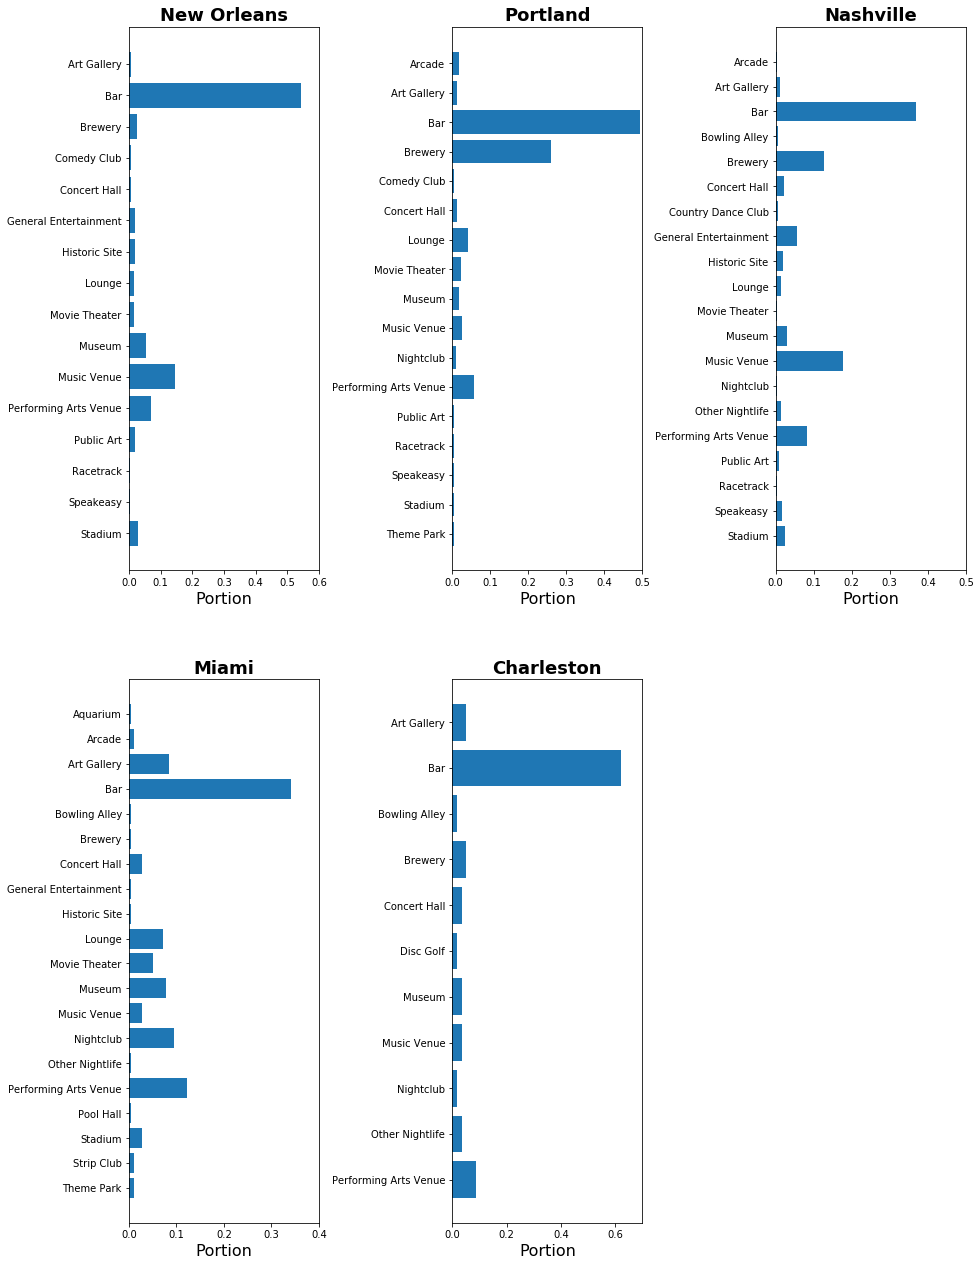

In [170]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15,22])

NO=plt.subplot(2, 3, 1)
plt.barh(Fun_NewOrleans.iloc[:]['Entertainment'], 
         Fun_NewOrleans.iloc[:]['Number'], align='center')
NO.set_xlim([0, 0.6])
NO.set_xlabel('Portion', fontsize=16)
NO.set_title('New Orleans', fontsize=18,weight='bold')

PO=plt.subplot(2, 3, 2)
plt.barh(Fun_Portland.iloc[:]['Entertainment'], 
         Fun_Portland.iloc[:]['Number'], align='center')
PO.set_xlim([0, 0.5])
PO.set_xlabel('Portion', fontsize=16)
PO.set_title('Portland', fontsize=18,weight='bold')

NA=plt.subplot(2, 3, 3)
plt.barh(Fun_Nashville.iloc[:]['Entertainment'], 
         Fun_Nashville.iloc[:]['Number'], align='center')
NA.set_xlim([0, 0.5])
NA.set_xlabel('Portion', fontsize=16)
NA.set_title('Nashville', fontsize=18,weight='bold')

MI=plt.subplot(2, 3, 4)
plt.barh(Fun_Miami.iloc[:]['Entertainment'], 
         Fun_Miami.iloc[:]['Number'], align='center')
MI.set_xlim([0, 0.4])
MI.set_xlabel('Portion', fontsize=16)
MI.set_title('Miami', fontsize=18,weight='bold')

CH=plt.subplot(2, 3, 5)
plt.barh(Fun_Charleston.iloc[:]['Entertainment'], 
         Fun_Charleston.iloc[:]['Number'], align='center')
CH.set_xlim([0, 0.7])
CH.set_xlabel('Portion', fontsize=16)
CH.set_title('Charleston', fontsize=18,weight='bold')

plt.subplots_adjust(wspace=0.7, hspace=0.2)
plt.show()
fig.savefig('Entertainment.png', dpi=300)

Shannon-Wiener Index is 2.4531032648598137
Shannon-Wiener Index is 2.3436052898888367
Shannon-Wiener Index is 2.992693264204632
Shannon-Wiener Index is 3.2450468827521215
Shannon-Wiener Index is 2.14700314115021


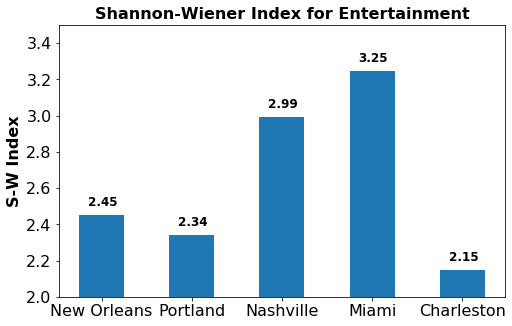

In [171]:
sw_NewOrleans=swindex(Fun_NewOrleans)  
sw_Portland=swindex(Fun_Portland)  
sw_Nashville=swindex(Fun_Nashville)  
sw_Miami=swindex(Fun_Miami)  
sw_Charleston=swindex(Fun_Charleston)

fig = plt.figure(figsize=[8,5])
NO=plt.subplot(1, 1, 1)
city=['New Orleans','Portland','Nashville','Miami','Charleston']
swcity=[sw_NewOrleans,sw_Portland,sw_Nashville,sw_Miami,sw_Charleston]
plt.bar(city, swcity,width=0.5)
r=[1,2,3,4,5]
label=swcity
for i in range(len(city)):
    plt.text(x = r[i]-1.15, y = swcity[i]+0.05, 
             s = round(label[i],2), size = 12, weight='bold')

NO.set_ylim([2.0, 3.5])
NO.set_ylabel('S-W Index',weight='bold',fontsize=16)
NO.tick_params(axis="y", labelsize=16)
NO.tick_params(axis="x", labelsize=16)
NO.set_title('Shannon-Wiener Index for Entertainment',weight='bold',fontsize=16)
fig.savefig('Entertainment-index.png', dpi=300)

### Outdoor (Natural sites for travel, i.e., park, beach, etc.)

In [172]:
def getOD(df,fs):
    columns=['Nature','Number']
    Tres=pd.DataFrame(columns=columns)
    for i in range(len(df)):
        cname=df.iloc[i]['Venue Category']
        pname=df.iloc[i]['Primary']
        if pname=='Outdoors & Recreation':
            a=fs.loc[fs['primary']==cname]
            if len(a)!=0:
                cname='General'
            a=fs.loc[fs['sub2']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']
            a=fs.loc[fs['sub3']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']    
            values=[cname,'1']
            Tres=Tres.append(pd.Series(values,index=columns),ignore_index=True)
    Tstat=Tres[['Nature','Number']].groupby('Nature').count()
    Tstat.sort_values(by='Nature',ascending=False,inplace=True)
    Tstat.reset_index(drop=False,inplace=True)
    totalnum=Tstat.sum().iloc[1]
    Tstat = Tstat.astype({"Number": float})
    for i in range(len(Tstat)):
        t=Tstat.iloc[i]['Number']
        Tstat.at[i,'Number']=t/totalnum
    print('Finished')
    return(Tstat)

In [173]:
OD_NewOrleans=getOD(NewOrleans_venues,FScategory2)
OD_Portland=getOD(Portland_venues,FScategory2)
OD_Nashville=getOD(Nashville_venues,FScategory2)
OD_Miami=getOD(Miami_venues,FScategory2)
OD_Charleston=getOD(Charleston_venues,FScategory2)

Finished
Finished
Finished
Finished
Finished


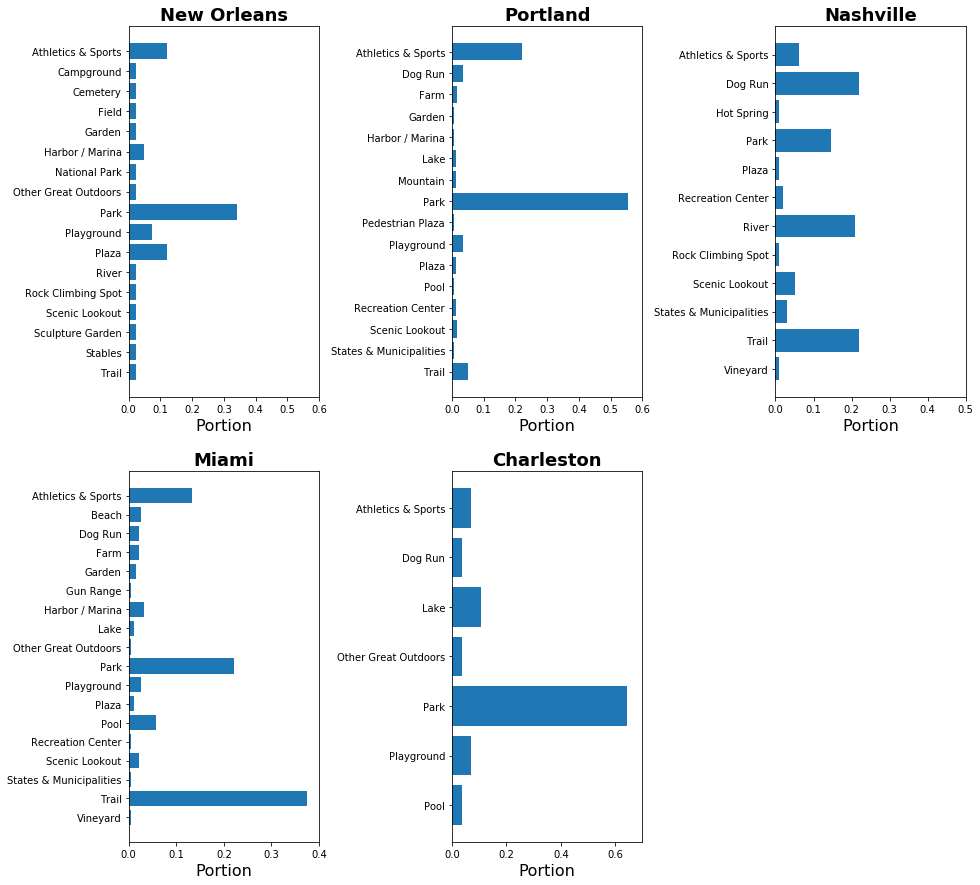

In [176]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15,15])

NO=plt.subplot(2, 3, 1)
plt.barh(OD_NewOrleans.iloc[:]['Nature'], 
         OD_NewOrleans.iloc[:]['Number'], align='center')
NO.set_xlim([0, 0.6])
NO.set_xlabel('Portion', fontsize=16)
NO.set_title('New Orleans', fontsize=18,weight='bold')

PO=plt.subplot(2, 3, 2)
plt.barh(OD_Portland.iloc[:]['Nature'], 
         OD_Portland.iloc[:]['Number'], align='center')
PO.set_xlim([0, 0.6])
PO.set_xlabel('Portion', fontsize=16)
PO.set_title('Portland', fontsize=18,weight='bold')

NA=plt.subplot(2, 3, 3)
plt.barh(OD_Nashville.iloc[:]['Nature'], 
         OD_Nashville.iloc[:]['Number'], align='center')
NA.set_xlim([0, 0.5])
NA.set_xlabel('Portion', fontsize=16)
NA.set_title('Nashville', fontsize=18,weight='bold')

MI=plt.subplot(2, 3, 4)
plt.barh(OD_Miami.iloc[:]['Nature'], 
         OD_Miami.iloc[:]['Number'], align='center')
MI.set_xlim([0, 0.4])
MI.set_xlabel('Portion', fontsize=16)
MI.set_title('Miami', fontsize=18,weight='bold')

CH=plt.subplot(2, 3, 5)
plt.barh(OD_Charleston.iloc[:]['Nature'], 
         OD_Charleston.iloc[:]['Number'], align='center')
CH.set_xlim([0, 0.7])
CH.set_xlabel('Portion', fontsize=16)
CH.set_title('Charleston', fontsize=18,weight='bold')

plt.subplots_adjust(wspace=0.7, hspace=0.2)
plt.show()
fig.savefig('Nature.png', dpi=300)

Shannon-Wiener Index is 3.326402312914583
Shannon-Wiener Index is 2.2052840738972366
Shannon-Wiener Index is 2.8548253596358557
Shannon-Wiener Index is 2.8598960049285704
Shannon-Wiener Index is 1.8140142960531365


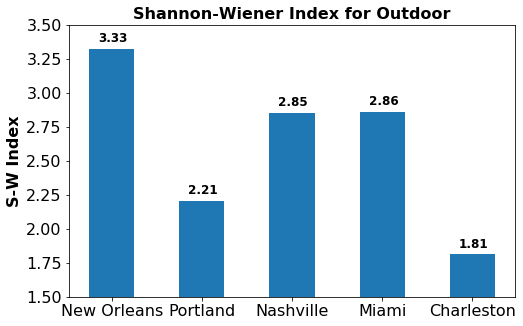

In [178]:
sw_NewOrleans=swindex(OD_NewOrleans)  
sw_Portland=swindex(OD_Portland)  
sw_Nashville=swindex(OD_Nashville)  
sw_Miami=swindex(OD_Miami)  
sw_Charleston=swindex(OD_Charleston)

fig = plt.figure(figsize=[8,5])
NO=plt.subplot(1, 1, 1)
city=['New Orleans','Portland','Nashville','Miami','Charleston']
swcity=[sw_NewOrleans,sw_Portland,sw_Nashville,sw_Miami,sw_Charleston]
plt.bar(city, swcity,width=0.5)
r=[1,2,3,4,5]
label=swcity
for i in range(len(city)):
    plt.text(x = r[i]-1.15, y = swcity[i]+0.05, 
             s = round(label[i],2), size = 12, weight='bold')

NO.set_ylim([1.5, 3.5])
NO.set_ylabel('S-W Index',weight='bold',fontsize=16)
NO.tick_params(axis="y", labelsize=16)
NO.tick_params(axis="x", labelsize=16)
NO.set_title('Shannon-Wiener Index for Outdoor',weight='bold',fontsize=16)
fig.savefig('Nature-index.png', dpi=300)

### Variety in shopping

In [179]:
def getSH(df,fs):
    columns=['Shopping','Number']
    Tres=pd.DataFrame(columns=columns)
    for i in range(len(df)):
        cname=df.iloc[i]['Venue Category']
        pname=df.iloc[i]['Primary']
        if pname=='Shop & Service':
            a=fs.loc[fs['primary']==cname]
            if len(a)!=0:
                cname='General'
            a=fs.loc[fs['sub2']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']
            a=fs.loc[fs['sub3']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']    
            values=[cname,'1']
            Tres=Tres.append(pd.Series(values,index=columns),ignore_index=True)
    Tstat=Tres[['Shopping','Number']].groupby('Shopping').count()
    Tstat.sort_values(by='Shopping',ascending=False,inplace=True)
    Tstat.reset_index(drop=False,inplace=True)
    totalnum=Tstat.sum().iloc[1]
    Tstat = Tstat.astype({"Number": float})
    for i in range(len(Tstat)):
        t=Tstat.iloc[i]['Number']
        Tstat.at[i,'Number']=t/totalnum
    print('Finished')
    return(Tstat)

In [180]:
SH_NewOrleans=getSH(NewOrleans_venues,FScategory2)
SH_Portland=getSH(Portland_venues,FScategory2)
SH_Nashville=getSH(Nashville_venues,FScategory2)
SH_Miami=getSH(Miami_venues,FScategory2)
SH_Charleston=getSH(Charleston_venues,FScategory2)

Finished
Finished
Finished
Finished
Finished


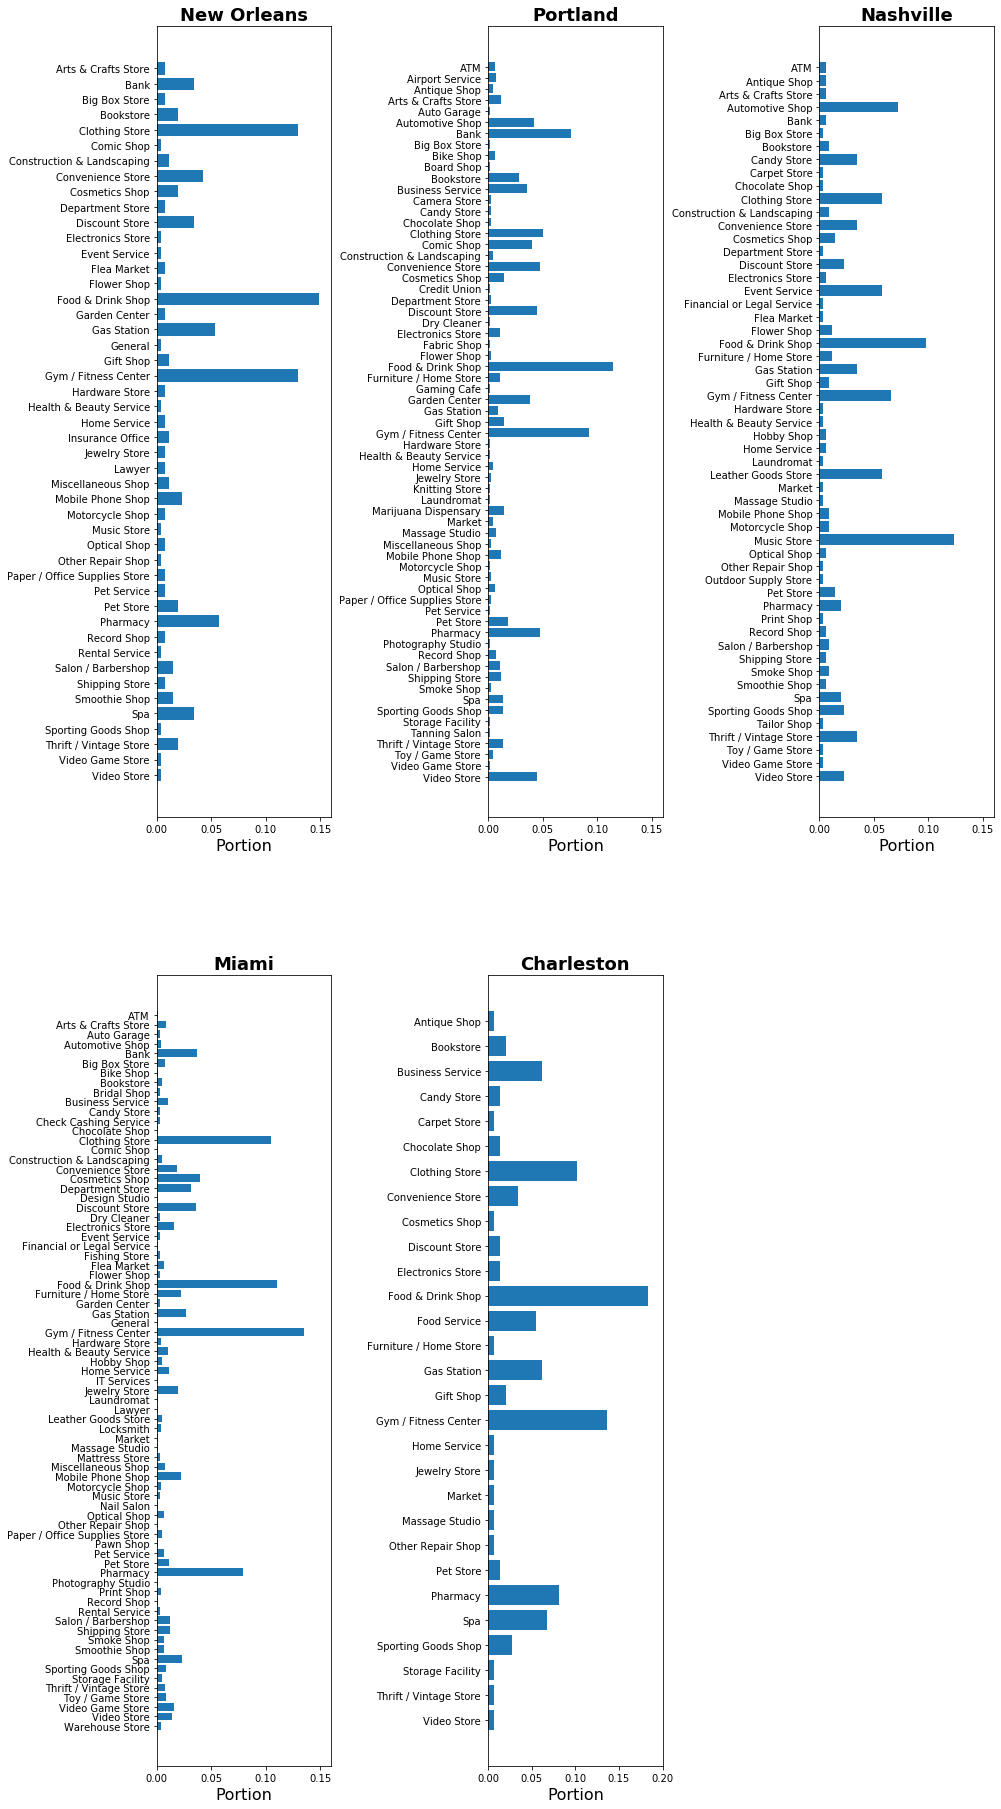

In [187]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[15,32])

NO=plt.subplot(2, 3, 1)
plt.barh(SH_NewOrleans.iloc[:]['Shopping'], 
         SH_NewOrleans.iloc[:]['Number'], align='center')
NO.set_xlim([0, 0.16])
NO.set_xlabel('Portion', fontsize=16)
NO.set_title('New Orleans', fontsize=18,weight='bold')

PO=plt.subplot(2, 3, 2)
plt.barh(SH_Portland.iloc[:]['Shopping'], 
         SH_Portland.iloc[:]['Number'], align='center')
PO.set_xlim([0, 0.16])
PO.set_xlabel('Portion', fontsize=16)
PO.set_title('Portland', fontsize=18,weight='bold')

NA=plt.subplot(2, 3, 3)
plt.barh(SH_Nashville.iloc[:]['Shopping'], 
         SH_Nashville.iloc[:]['Number'], align='center')
NA.set_xlim([0, 0.16])
NA.set_xlabel('Portion', fontsize=16)
NA.set_title('Nashville', fontsize=18,weight='bold')

MI=plt.subplot(2, 3, 4)
plt.barh(SH_Miami.iloc[:]['Shopping'], 
         SH_Miami.iloc[:]['Number'], align='center')
MI.set_xlim([0, 0.16])
MI.set_xlabel('Portion', fontsize=16)
MI.set_title('Miami', fontsize=18,weight='bold')

CH=plt.subplot(2, 3, 5)
plt.barh(SH_Charleston.iloc[:]['Shopping'], 
         SH_Charleston.iloc[:]['Number'], align='center')
CH.set_xlim([0, 0.2])
CH.set_xlabel('Portion', fontsize=16)
CH.set_title('Charleston', fontsize=18,weight='bold')

plt.subplots_adjust(wspace=0.9, hspace=0.2)
plt.show()
fig.savefig('Shopping.png', dpi=300)

Shannon-Wiener Index is 4.542605836124223
Shannon-Wiener Index is 4.94655403716386
Shannon-Wiener Index is 4.826333086126378
Shannon-Wiener Index is 4.927712031721741
Shannon-Wiener Index is 4.003476563526559


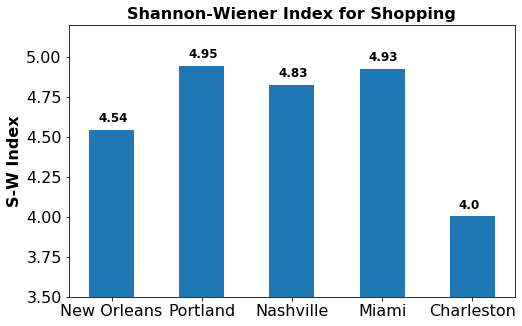

In [189]:
sw_NewOrleans=swindex(SH_NewOrleans)  
sw_Portland=swindex(SH_Portland)  
sw_Nashville=swindex(SH_Nashville)  
sw_Miami=swindex(SH_Miami)  
sw_Charleston=swindex(SH_Charleston)

fig = plt.figure(figsize=[8,5])
NO=plt.subplot(1, 1, 1)
city=['New Orleans','Portland','Nashville','Miami','Charleston']
swcity=[sw_NewOrleans,sw_Portland,sw_Nashville,sw_Miami,sw_Charleston]
plt.bar(city, swcity,width=0.5)
r=[1,2,3,4,5]
label=swcity
for i in range(len(city)):
    plt.text(x = r[i]-1.15, y = swcity[i]+0.05, 
             s = round(label[i],2), size = 12, weight='bold')

NO.set_ylim([3.5, 5.2])
NO.set_ylabel('S-W Index',weight='bold',fontsize=16)
NO.tick_params(axis="y", labelsize=16)
NO.tick_params(axis="x", labelsize=16)
NO.set_title('Shannon-Wiener Index for Shopping',weight='bold',fontsize=16)
fig.savefig('Shopping-index.png', dpi=300)

### Now evaluate convenience in lodge and transport, just compare the number

In [517]:
def getLT(df,fs):
    columns=['Travel','Lat','Lon','LTlabel']
    Tres=pd.DataFrame(columns=columns)
    for i in range(len(df)):
        cname=df.iloc[i]['Venue Category']
        pname=df.iloc[i]['Primary']
        if pname=='Travel & Transport':
            a=fs.loc[fs['primary']==cname]
            if len(a)!=0:
                cname='General'
            a=fs.loc[fs['sub2']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1']
            a=fs.loc[fs['sub3']==cname]
            if len(a)!=0:
                b=a.index[0]
                cname=fs.iloc[b]['sub1'] 
            lat=df.iloc[i]['Venue Latitude'] 
            lon=df.iloc[i]['Venue Longitude']
            if cname=='Hotel':
                label=0
            else:
                label=1
            values=[cname,lat,lon,label]
            Tres=Tres.append(pd.Series(values,index=columns),ignore_index=True)
    print('Finished')
    return(Tres)

In [518]:
LT_NewOrleans=getLT(NewOrleans_venues,FScategory2)
LT_Portland=getLT(Portland_venues,FScategory2)
LT_Nashville=getLT(Nashville_venues,FScategory2)
LT_Miami=getLT(Miami_venues,FScategory2)
LT_Charleston=getLT(Charleston_venues,FScategory2)

Finished
Finished
Finished
Finished
Finished


In [650]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

cityname=LT_Nashville #change city name to view different city

latitude=cityname['Lat'].mean()
longitude=cityname['Lon'].mean()

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(Touristlabel)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red','blue']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in \
zip(cityname['Lat'], cityname['Lon'],\
    cityname['Travel'], cityname['LTlabel']):
    label = folium.Popup(str(poi), parse_html=True)
    map_clusters.add_child(folium.Marker(location=[lat, lon], \
       popup=label, \
       icon=folium.Icon(color=rainbow[cluster], \
       prefix='fa', icon='circle'))) 

legend_html = '''
<div style="position: fixed; 
top: 10px; left: 50px; width: 180px; height: 200px; 
border:2px solid grey; z-index:9999; font-size:14px;
">&nbsp; Cool Legend <br>
&nbsp; Lodge &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
&nbsp; Transport &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i>
</div>
''' 
map_clusters.get_root().html.add_child(folium.Element(legend_html))
map_clusters

#### Consider city functionality for tourist 
'Arts & Entertainment', 'Event', 'Food', 'Nightlife Spot' 'Outdoors & Recreation', 'Shop & Service', 'Travel & Transport'

In [233]:
Touristcare=['Arts & Entertainment','Event','Food','Nightlife Spot','Outdoors & Recreation',
'Shop & Service','Travel & Transport']
Touristlabel=[0,1,2,3,4,5,6]
def getTvenue(df):
    clabel=[]
    Tvenue=pd.DataFrame(columns=list(df.columns))
    for i in range(len(df)):
        cname=df.iloc[i]['Primary']
        if cname in Touristcare:
            Tvenue=Tvenue.append(df.iloc[i])
            clabel.append(Touristlabel[Touristcare.index(cname)])
    Tvenue['Clabel']=clabel        
    Tvenue.reset_index(drop=True,inplace=True) 
    Tvenue.sort_values(by='Primary',inplace=True)
    print('Finished')  
    return(Tvenue)

Tvenue_NewOrleans=getTvenue(NewOrleans_venues)
Tvenue_Portland=getTvenue(Portland_venues)
Tvenue_Nashville=getTvenue(Nashville_venues)
Tvenue_Miami=getTvenue(Miami_venues)
Tvenue_Charleston=getTvenue(Charleston_venues)

Finished
Finished
Finished
Finished
Finished


In [234]:
Tvenue_NewOrleans

,Neighborhood Zip,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Primary,Clabel
731,70130,29.938005,-90.071950,US Freedom Pavillion: The Boeing Center,29.941679,-90.070788,History Museum,Arts & Entertainment,0
826,70140,29.956120,-90.078312,Mercedes-Benz Superdome,29.952017,-90.080451,Football Stadium,Arts & Entertainment,0
827,70140,29.956120,-90.078312,Saenger Theatre,29.956432,-90.072603,Performing Arts Venue,Arts & Entertainment,0
828,70140,29.956120,-90.078312,Krewe Of Endymion,29.952423,-90.074455,General Entertainment,Arts & Entertainment,0
830,70140,29.956120,-90.078312,Sanger Theater,29.955970,-90.072886,Theater,Arts & Entertainment,0
...,...,...,...,...,...,...,...,...,...
1122,70163,29.950060,-90.075320,Le Pavillon Hotel,29.950479,-90.072933,Hotel,Travel & Transport,6
829,70140,29.956120,-90.078312,The Roosevelt New Orleans,29.954343,-90.072298,Hotel,Travel & Transport,6
196,70115,29.927305,-90.101970,Maison Perrier,29.924732,-90.098933,Hotel,Travel & Transport,6
1116,70163,29.950060,-90.075320,Drury Inn & Suites New Orleans,29.949659,-90.071859,Hotel,Travel & Transport,6


### Map categorized venues in each city

In [526]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium

cityname=Tvenue_Charleston #change city name to view different city

latitude=cityname['Venue Latitude'].mean()
longitude=cityname['Venue Longitude'].mean()

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
#x = np.arange(Touristlabel)
#ys = [i + x + (i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red','blue','green','beige','pink','black','purple']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in \
zip(cityname['Venue Latitude'], cityname['Venue Longitude'],\
    cityname['Primary'], cityname['Clabel']):
    label = folium.Popup(str(poi), parse_html=True)
    map_clusters.add_child(folium.Marker(location=[lat, lon], \
       popup=label, \
       icon=folium.Icon(color=rainbow[cluster], \
       prefix='fa', icon='circle')))
'Arts & Entertainment', 'Event', 'Food', 'Nightlife Spot' 
'Outdoors & Recreation', 'Shop & Service', 'Travel & Transport'  

legend_html = '''
<div style="position: fixed; 
top: 10px; left: 50px; width: 180px; height: 200px; 
border:2px solid grey; z-index:9999; font-size:14px;
">&nbsp; Cool Legend <br>
&nbsp; Arts & Entertainment &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
&nbsp; Event &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i>
&nbsp; Food &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i>
&nbsp; Nightlife Spot &nbsp; <i class="fa fa-map-marker fa-2x" style="color:beige"></i>
&nbsp; Outdoors & Recreation &nbsp; <i class="fa fa-map-marker fa-2x" style="color:pink"></i>
&nbsp; Shop & Service &nbsp; <i class="fa fa-map-marker fa-2x" style="color:black"></i>
&nbsp; Travel & Transport &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i>
</div>
''' 
map_clusters.get_root().html.add_child(folium.Element(legend_html))
#map_clusters

### Calculate collection vector

In [199]:
def getvector(Tvenue):
    Tstat=Tvenue[['Primary','Venue']].groupby('Primary').count()
    Tstat2=list(set(Touristcare)-set(Tstat.index))
    Tstat.reset_index(drop=False,inplace=True)
    totalnum=Tstat.sum().iloc[1]
    for i in range(len(Tstat2)):
        values=[Tstat2[i],0.0]
        Tstat=Tstat.append(pd.Series(values,index=Tstat.columns),ignore_index=True)
    Tstat.sort_values(by='Primary',inplace=True)
    Tstat.reset_index(drop=True,inplace=True)
    vector=Tstat["Venue"].tolist()
    vector=[x/totalnum for x in vector]
    print(vector)
    #print(Tstat)
    return(vector)

vector_NewOrleans=getvector(Tvenue_NewOrleans)
vector_Portland=getvector(Tvenue_Portland)
vector_Nashville=getvector(Tvenue_Nashville)
vector_Miami=getvector(Tvenue_Miami)
vector_Charleston=getvector(Tvenue_Charleston)

[0.0782122905027933, 0.0, 0.46288906624102155, 0.11252992817238627, 0.03272146847565842, 0.20909816440542697, 0.10454908220271349]
[0.020742884708152436, 0.0, 0.4211287988422576, 0.08683068017366136, 0.085383502170767, 0.3236854799807043, 0.06222865412445731]
[0.1054354944335298, 0.0, 0.41453831041257366, 0.12639161755075312, 0.06286836935166994, 0.22855271774721678, 0.06221349050425671]
[0.03571428571428571, 0.0, 0.4532312925170068, 0.04039115646258504, 0.08035714285714286, 0.3439625850340136, 0.04634353741496599]
[0.026359143327841845, 0.0, 0.5617792421746294, 0.06919275123558484, 0.04612850082372323, 0.24217462932454695, 0.054365733113673806]


In [200]:
tau,p_value=stats.kendalltau(vector_NewOrleans,vector_Charleston)
tau

0.9047619047619049

In [201]:
from scipy import stats

citymatrix=[vector_NewOrleans,vector_Portland,
            vector_Nashville,vector_Miami,vector_Charleston]

taumatrix=np.zeros((5,5))
dmatrix=np.zeros((5,5))

for i in range(5):
    for j in range(i,5):
        tau,p_value=stats.kendalltau(citymatrix[i],citymatrix[j])
        dist = np.linalg.norm(np.asarray(citymatrix[i])
                              -np.asarray(citymatrix[j]))
        taumatrix[i][j]=tau
        taumatrix[j][i]=tau
        dmatrix[i][j]=dist
        dmatrix[j][i]=dist

print(taumatrix)
print(dmatrix)
print(len(dmatrix))

[[1.         0.80952381 0.80952381 0.61904762 0.9047619 ]
 [0.80952381 1.         0.80952381 0.80952381 0.9047619 ]
 [0.80952381 0.80952381 1.         0.61904762 0.71428571]
 [0.61904762 0.80952381 0.61904762 1.         0.71428571]
 [0.9047619  0.9047619  0.71428571 0.71428571 1.        ]]
[[0.         0.15297603 0.07969104 0.17592274 0.13467849]
 [0.15297603 0.         0.13541977 0.06403206 0.16843986]
 [0.07969104 0.13541977 0.         0.16622702 0.17813489]
 [0.17592274 0.06403206 0.16622702 0.         0.15587319]
 [0.13467849 0.16843986 0.17813489 0.15587319 0.        ]]
5


In [255]:
def getScore1():
    lists=[]
    matrix=[vector_NewOrleans,vector_Portland,vector_Nashville,
           vector_Miami,vector_Charleston]
    
    x=float(input('entertainment:'))
    lists.append(x)
    x=float(input('event:'))
    lists.append(x)
    x=float(input('food:'))
    lists.append(x)
    x=float(input('nightlife:'))
    lists.append(x)
    x=float(input('outdoor:'))
    lists.append(x)
    x=float(input('shop:'))
    lists.append(x)
    x=float(input('travel:'))
    lists.append(x)    
    
    score=[0.0,0.0,0.0,0.0,0.0]

    for j in range(len(matrix)):
        for i in range(len(lists)):
            score[j]=score[j]+lists[i]*matrix[j][i]
            
    print("Scores:\nNew Orleans={0:5.2f}\nPortland={1:5.2f}\nNashville={2:5.2f}\nMiami={3:5.2f}\nCharleston={4:5.2f}"\
          .format(score[0],score[1],score[2],score[3],score[4]))
    return

def getScore2():
    n=int(input('How many features you want:'))
    lists=[]
    for i in range(n):
        x=input('please indicate (lower case):')
        lists.append(x)
        
    print(lists)
        
    score=0.0
    for i in range(len(Tvenue_NewOrleans)):
        for j in range(len(lists)):
            if lists[j] in Tvenue_NewOrleans.iloc[i]['Venue Category'].lower():
                score+=1
    print('New Orleans={}'.format(score))
    
    score=0.0
    for i in range(len(Tvenue_Portland)):
        for j in range(len(lists)):
            if lists[j] in Tvenue_Portland.iloc[i]['Venue Category'].lower():
                score+=1
    print('Portland={}'.format(score))
    
    score=0.0
    for i in range(len(Tvenue_Nashville)):
        for j in range(len(lists)):
            if lists[j] in Tvenue_Nashville.iloc[i]['Venue Category'].lower():
                score+=1
    print('Nashville={}'.format(score))
    
    score=0.0
    for i in range(len(Tvenue_Miami)):
        for j in range(len(lists)):
            if lists[j] in Tvenue_Miami.iloc[i]['Venue Category'].lower():
                score+=1
    print('Miami={}'.format(score))
    
    score=0.0
    for i in range(len(Tvenue_Charleston)):
        for j in range(len(lists)):
            if lists[j] in Tvenue_Charleston.iloc[i]['Venue Category'].lower():
                score+=1
    print('Charleston={}'.format(score))
    
    return

def getScore():
    itype=int(input('choose method: 1 or 2\n'))
    if itype==1:
        getScore1()
    else:
        getScore2()
    return

getScore()

choose method: 1 or 2
1
entertainment:5
event:4
food:5
nightlife:5
outdoor:5
shop:3
travel:4
Scores:
New Orleans= 4.48
Portland= 4.29
Nashville= 4.48
Miami= 4.27
Charleston= 4.46
